In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly

In [2]:
df=pd.read_csv('modified_data.csv')
df.head()

,location,totalConfirmedCases,newlyConfirmedCases,totalDeaths,newDeaths,totalRecoveredCases,newlyRecoveredCases
0,Afghanistan,55696,16,2442,4,49281,195
1,Albania,104313,986,1736,21,67158,849
2,Algeria,112622,161,2973,3,77683,146
3,Andorra,10799,24,110,0,10356,37
4,Angola,20695,55,502,1,19238,17


Data Cleaning 

In [10]:
# Remove if our data has dublicates..
df[df.duplicated(keep=False)]
df

,location,totalConfirmedCases,newlyConfirmedCases,totalDeaths,newDeaths,totalRecoveredCases,newlyRecoveredCases
0,Afghanistan,55696,16,2442,4,49281,195
1,Albania,104313,986,1736,21,67158,849
2,Algeria,112622,161,2973,3,77683,146
3,Andorra,10799,24,110,0,10356,37
4,Angola,20695,55,502,1,19238,17
...,...,...,...,...,...,...,...
229,Wallis and Futuna,9,0,0,0,6,0
230,Marshall Islands,4,0,0,0,4,0
231,Vanuatu,1,0,0,0,1,0
232,Samoa,3,0,0,0,2,0


In [11]:
#Checking if our data has null values
df.isnull()

,location,totalConfirmedCases,newlyConfirmedCases,totalDeaths,newDeaths,totalRecoveredCases,newlyRecoveredCases
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False


In [13]:
df.shape
df.sum

<bound method DataFrame.sum of               location  totalConfirmedCases  newlyConfirmedCases  totalDeaths  \
0          Afghanistan                55696                   16         2442   
1              Albania               104313                  986         1736   
2              Algeria               112622                  161         2973   
3              Andorra                10799                   24          110   
4               Angola                20695                   55          502   
..                 ...                  ...                  ...          ...   
229  Wallis and Futuna                    9                    0            0   
230   Marshall Islands                    4                    0            0   
231            Vanuatu                    1                    0            0   
232              Samoa                    3                    0            0   
233         Micronesia                    1                    0            0 

Time Series Visualization of of 'totalConfirmedCases', 'totalDeaths', and 'totalRecoveredCases' over time. 

In [3]:
import plotly.graph_objs as go
grouped_df = df.groupby('location')[['totalConfirmedCases', 'totalDeaths', 'totalRecoveredCases']].sum().reset_index()
trace_confirmed = go.Bar(x=grouped_df['location'], y=grouped_df['totalConfirmedCases'], name='Total Confirmed Cases')
trace_deaths = go.Bar(x=grouped_df['location'], y=grouped_df['totalDeaths'], name='Total Deaths')
trace_recovered = go.Bar(x=grouped_df['location'], y=grouped_df['totalRecoveredCases'], name='Total Recovered Cases')
layout = go.Layout(title='COVID-19 Cases by Location',
                   xaxis=dict(title='Location'),
                   yaxis=dict(title='Count'),
                   barmode='group')
fig = go.Figure(data=[trace_confirmed, trace_deaths, trace_recovered], layout=layout)
fig.write_image('images/COVID-19 Cases by Location.jpeg')
fig.show()

In [4]:
import plotly.graph_objs as go
grouped_df = df.groupby('location')[['totalConfirmedCases', 'totalDeaths', 'totalRecoveredCases']].sum().reset_index()
grouped_df_filtered = grouped_df[grouped_df['totalConfirmedCases'] > 4000000]
trace_confirmed = go.Bar(x=grouped_df_filtered['location'], y=grouped_df_filtered['totalConfirmedCases'], name='Total Confirmed Cases')
trace_deaths = go.Bar(x=grouped_df_filtered['location'], y=grouped_df_filtered['totalDeaths'], name='Total Deaths')
trace_recovered = go.Bar(x=grouped_df_filtered['location'], y=grouped_df_filtered['totalRecoveredCases'], name='Total Recovered Cases')
layout = go.Layout(title='COVID-19 Cases Distribution by Location (Total Confirmed Cases > 4 Million)',
                   xaxis=dict(title='Location'),
                   yaxis=dict(title='Count'),
                   barmode='stack')
fig = go.Figure(data=[trace_confirmed, trace_deaths, trace_recovered], layout=layout)
fig.show()

Top 20 countries with the most covid cases.

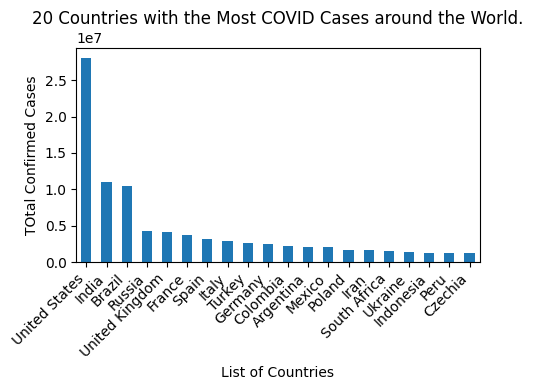

In [5]:
cases_by_country = df.groupby('location').sum()['totalConfirmedCases'].sort_values(ascending=False).head(20)
plt.figure(figsize=(5, 4))
cases_by_country.plot(kind='bar')
plt.title('20 Countries with the Most COVID Cases around the World.')
plt.xlabel('List of Countries')
plt.ylabel('TOtal Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/Top 20 Countries with most Covid cases.jpeg')
plt.show()

Top 20 countries with the least covid cases.

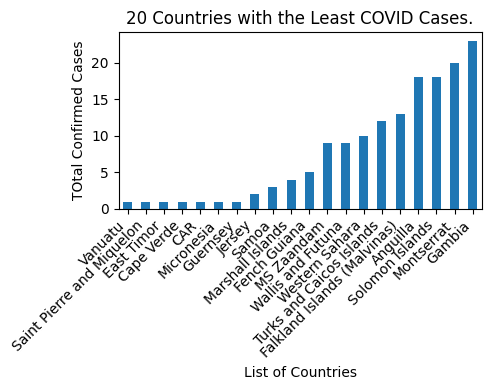

In [6]:
cases_by_country = df.groupby('location').sum()['totalConfirmedCases'].sort_values(ascending=True).head(20)
# Plotting
plt.figure(figsize=(5, 4))
cases_by_country.plot(kind='bar')
plt.title('20 Countries with the Least COVID Cases.')
plt.xlabel('List of Countries')
plt.ylabel('TOtal Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/20 Countries with Least Covid cases.jpeg')
plt.show()

Top 20 countries with the Highest covid casualties.

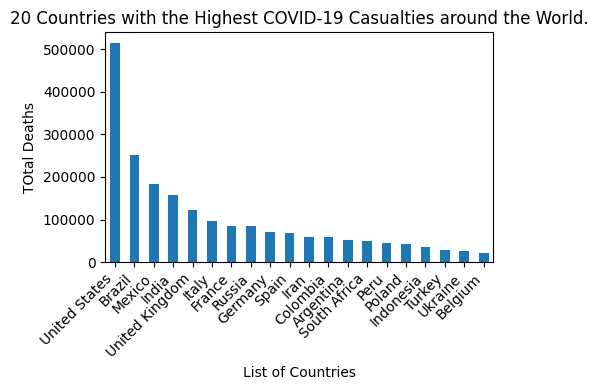

In [7]:
cases_by_country = df.groupby('location').sum()['totalDeaths'].sort_values(ascending=False).head(20)
# Plotting
plt.figure(figsize=(5, 4))
cases_by_country.plot(kind='bar')
plt.title('20 Countries with the Highest COVID-19 Casualties around the World.')
plt.xlabel('List of Countries')
plt.ylabel('TOtal Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/Top 20 Countries with most Covid casualties.jpeg')
plt.show()

Top 20 countries with the Least covid casualties.

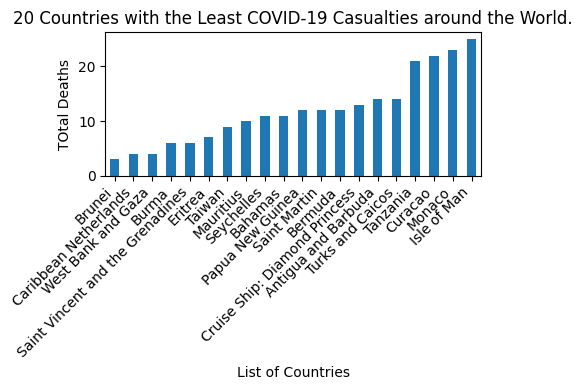

In [8]:
cases_by_country = df.groupby('location').sum()['totalDeaths'].sort_values(ascending=True).iloc[40:60]
# Plotting
plt.figure(figsize=(5, 4))
cases_by_country.plot(kind='bar')
plt.title('20 Countries with the Least COVID-19 Casualties around the World.')
plt.xlabel('List of Countries')
plt.ylabel('TOtal Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/Top 20 Countries with least Covid casualties.jpeg')
plt.show()

Top 20 countries with the Highest covid Recoveries.

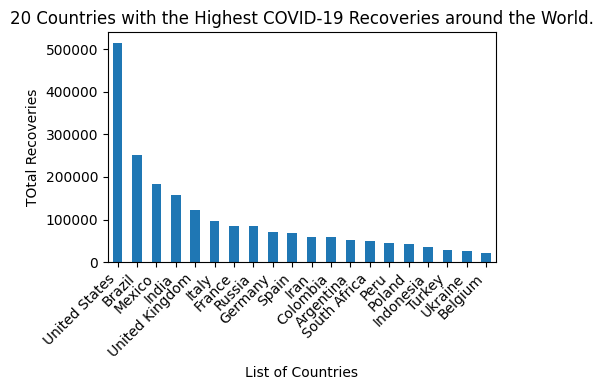

In [9]:
cases_by_country = df.groupby('location').sum()['totalDeaths'].sort_values(ascending=False).head(20)
# Plotting
plt.figure(figsize=(5, 4))
cases_by_country.plot(kind='bar')
plt.title('20 Countries with the Highest COVID-19 Recoveries around the World.')
plt.xlabel('List of Countries')
plt.ylabel('TOtal Recoveries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/Top 20 Countries with most Covid Recoveries.jpeg')
plt.show()

Top 20 countries with the Least covid Recoveries.

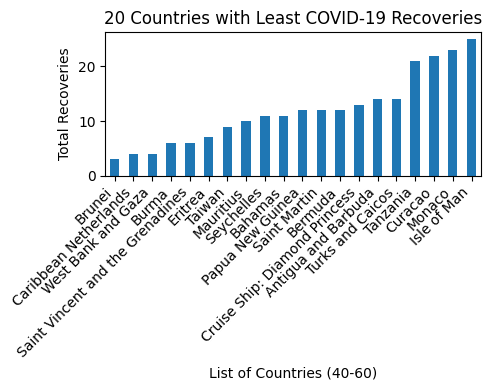

In [10]:
cases_by_country = df.groupby('location').sum()['totalDeaths'].sort_values(ascending=True).iloc[40:60]
# Plotting
plt.figure(figsize=(5, 4))
cases_by_country.plot(kind='bar')
plt.title('20 Countries with Least COVID-19 Recoveries')
plt.xlabel('List of Countries (40-60)')
plt.ylabel('Total Recoveries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/20 Countries with Least COVID Recoveries.jpeg')
plt.show()


Lets create the world map.

In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
fig = go.Figure()


# Replace with the path to your dataset
df = pd.read_csv('modified_data.csv')

# Rename the columns for better readability
df.columns = ['Country', 'Total Confirmed Cases', 'New Confirmed Cases', 'Total Deaths', 'New Deaths', 'Total Recovered Cases', 'Newly Recovered Cases']

# Create a figure object
fig = px.choropleth(df, 
                    locations='Country', 
                    locationmode='country names',  # Ensure proper mapping by country names
                    color='Total Confirmed Cases', 
                    hover_name='Country', 
                    hover_data=['Total Confirmed Cases', 'New Confirmed Cases', 'Total Deaths', 'New Deaths', 'Total Recovered Cases', 'Newly Recovered Cases'], 
                    projection='natural earth', 
                    color_continuous_scale='Plasma',  # Choose a colorful scale
                    labels={'Total Confirmed Cases': 'Total Cases'})  # Custom label for color legend

# Customize the layout
fig.update_layout(
    title='COVID-19 Cases Worldwide',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Display the interactive map
pio.write_html(fig, 'COVID-19 Cases Worldwide.html')
fig.show()